In [1]:
import numpy as np 
import pandas as pd

In [2]:
df=pd.read_csv("wfp_food_prices_ind.csv")

C:\Users\Bindu\AppData\Local\Temp\ipykernel_23912\3794879321.py:1: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("wfp_food_prices_ind.csv")


In [3]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
4,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988


In [4]:
df = df.drop(df.index[0])

In [5]:
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
4,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
5,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280409,2024-01-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (masur),KG,forecast,Retail,INR,0.0,0.0
280410,2024-01-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (moong),KG,forecast,Retail,INR,0.0,0.0
280411,2024-01-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,pulses and nuts,Lentils (urad),KG,forecast,Retail,INR,0.0,0.0
280412,2024-01-15,West Bengal,West Midnapore,Kharagpur,22.33933,87.22672,vegetables and fruits,Onions,KG,forecast,Retail,INR,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280413 entries, 1 to 280413
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       280413 non-null  object
 1   admin1     279498 non-null  object
 2   admin2     279498 non-null  object
 3   market     280413 non-null  object
 4   latitude   279498 non-null  object
 5   longitude  279498 non-null  object
 6   category   280413 non-null  object
 7   commodity  280413 non-null  object
 8   unit       280413 non-null  object
 9   priceflag  280413 non-null  object
 10  pricetype  280413 non-null  object
 11  currency   280413 non-null  object
 12  price      280413 non-null  object
 13  usdprice   280413 non-null  object
dtypes: object(14)
memory usage: 30.0+ MB


In [7]:
df.category.value_counts()

oil and fats             70329
cereals and tubers       61783
miscellaneous food       55127
pulses and nuts          51219
vegetables and fruits    27609
milk and dairy           14346
Name: category, dtype: int64

In [8]:
df['date'] = pd.to_datetime(df['date'])

# Convert 'price', 'usdprice', 'latitude', and 'longitude' columns to numeric (integer) data type
df[['price', 'usdprice', 'latitude', 'longitude']] = df[['price', 'usdprice', 'latitude', 'longitude']].apply(pd.to_numeric)

# Now, 'date' column is of datetime data type, and 'price', 'usdprice', 'latitude', and 'longitude' columns are integers
print(df.dtypes)

date         datetime64[ns]
admin1               object
admin2               object
market               object
latitude            float64
longitude           float64
category             object
commodity            object
unit                 object
priceflag            object
pricetype            object
currency             object
price               float64
usdprice            float64
dtype: object


In [9]:
df[df['price']==0]

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
211063,2015-01-15,Kerala,Thiruvananthapuram,Tiruvanantapuram,8.506944,76.956944,cereals and tubers,Potatoes,KG,forecast,Retail,INR,0.0,0.0
211064,2015-01-15,Kerala,Thiruvananthapuram,Tiruvanantapuram,8.506944,76.956944,cereals and tubers,Rice,KG,forecast,Retail,INR,0.0,0.0
211065,2015-01-15,Kerala,Thiruvananthapuram,Tiruvanantapuram,8.506944,76.956944,cereals and tubers,Wheat,KG,forecast,Retail,INR,0.0,0.0
211066,2015-01-15,Kerala,Thiruvananthapuram,Tiruvanantapuram,8.506944,76.956944,cereals and tubers,Wheat flour,KG,forecast,Retail,INR,0.0,0.0
211067,2015-01-15,Kerala,Thiruvananthapuram,Tiruvanantapuram,8.506944,76.956944,milk and dairy,Milk (pasteurized),L,forecast,Retail,INR,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280409,2024-01-15,West Bengal,West Midnapore,Kharagpur,22.339330,87.226720,pulses and nuts,Lentils (masur),KG,forecast,Retail,INR,0.0,0.0
280410,2024-01-15,West Bengal,West Midnapore,Kharagpur,22.339330,87.226720,pulses and nuts,Lentils (moong),KG,forecast,Retail,INR,0.0,0.0
280411,2024-01-15,West Bengal,West Midnapore,Kharagpur,22.339330,87.226720,pulses and nuts,Lentils (urad),KG,forecast,Retail,INR,0.0,0.0
280412,2024-01-15,West Bengal,West Midnapore,Kharagpur,22.339330,87.226720,vegetables and fruits,Onions,KG,forecast,Retail,INR,0.0,0.0


In [10]:
df = df[df['price'] != 0]

In [11]:
df[df['price']==0]

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice


In [12]:
df.isnull().sum()

date           0
admin1       789
admin2       789
market         0
latitude     789
longitude    789
category       0
commodity      0
unit           0
priceflag      0
pricetype      0
currency       0
price          0
usdprice       0
dtype: int64

In [13]:
df.dropna(axis = 0,inplace = True)

C:\Users\Bindu\AppData\Local\Temp\ipykernel_23912\941287652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis = 0,inplace = True)


In [14]:
df.isnull().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

In [15]:
df.admin1.value_counts()

Uttar Pradesh          16700
Bihar                  15347
Madhya Pradesh         14240
Tamil Nadu             12722
Orissa                 12499
Maharashtra            11589
Karnataka              11483
Rajasthan              10054
Kerala                  9065
Gujarat                 9015
Haryana                 8993
West Bengal             8847
Himachal Pradesh        7607
Punjab                  7198
Telangana               6698
Jharkhand               6134
Delhi                   4597
Andhra Pradesh          4529
Uttarakhand             4514
Meghalaya               4234
Chhattisgarh            3329
Assam                   2839
Andaman and Nicobar     2810
Nagaland                2627
Tripura                 2498
Chandigarh              2493
Puducherry              2392
Goa                     2218
Mizoram                 1950
Sikkim                   627
Manipur                  425
Name: admin1, dtype: int64

In [16]:
df.rename(columns={'admin1': 'state'}, inplace=True)
df.rename(columns={'admin2': 'place'}, inplace=True)

C:\Users\Bindu\AppData\Local\Temp\ipykernel_23912\1288443484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'admin1': 'state'}, inplace=True)
C:\Users\Bindu\AppData\Local\Temp\ipykernel_23912\1288443484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'admin2': 'place'}, inplace=True)


In [17]:
df

,date,state,place,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.00,0.2550
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.00,0.1594
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.50,0.4303
4,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.00,0.9880
5,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.80,0.2167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211058,2023-07-15,West Bengal,West Midnapore,Kharagpur,22.339330,87.226720,pulses and nuts,Lentils (masur),KG,actual,Retail,INR,105.40,1.2831
211059,2023-07-15,West Bengal,West Midnapore,Kharagpur,22.339330,87.226720,pulses and nuts,Lentils (moong),KG,actual,Retail,INR,114.95,1.3994
211060,2023-07-15,West Bengal,West Midnapore,Kharagpur,22.339330,87.226720,pulses and nuts,Lentils (urad),KG,actual,Retail,INR,115.10,1.4012
211061,2023-07-15,West Bengal,West Midnapore,Kharagpur,22.339330,87.226720,vegetables and fruits,Onions,KG,actual,Retail,INR,28.15,0.3427


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Bindu\AppData\Local\Temp\ipykernel_23912\3670188067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\Bindu\AppData\Local\Temp\ipykernel_23912\3670188067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year


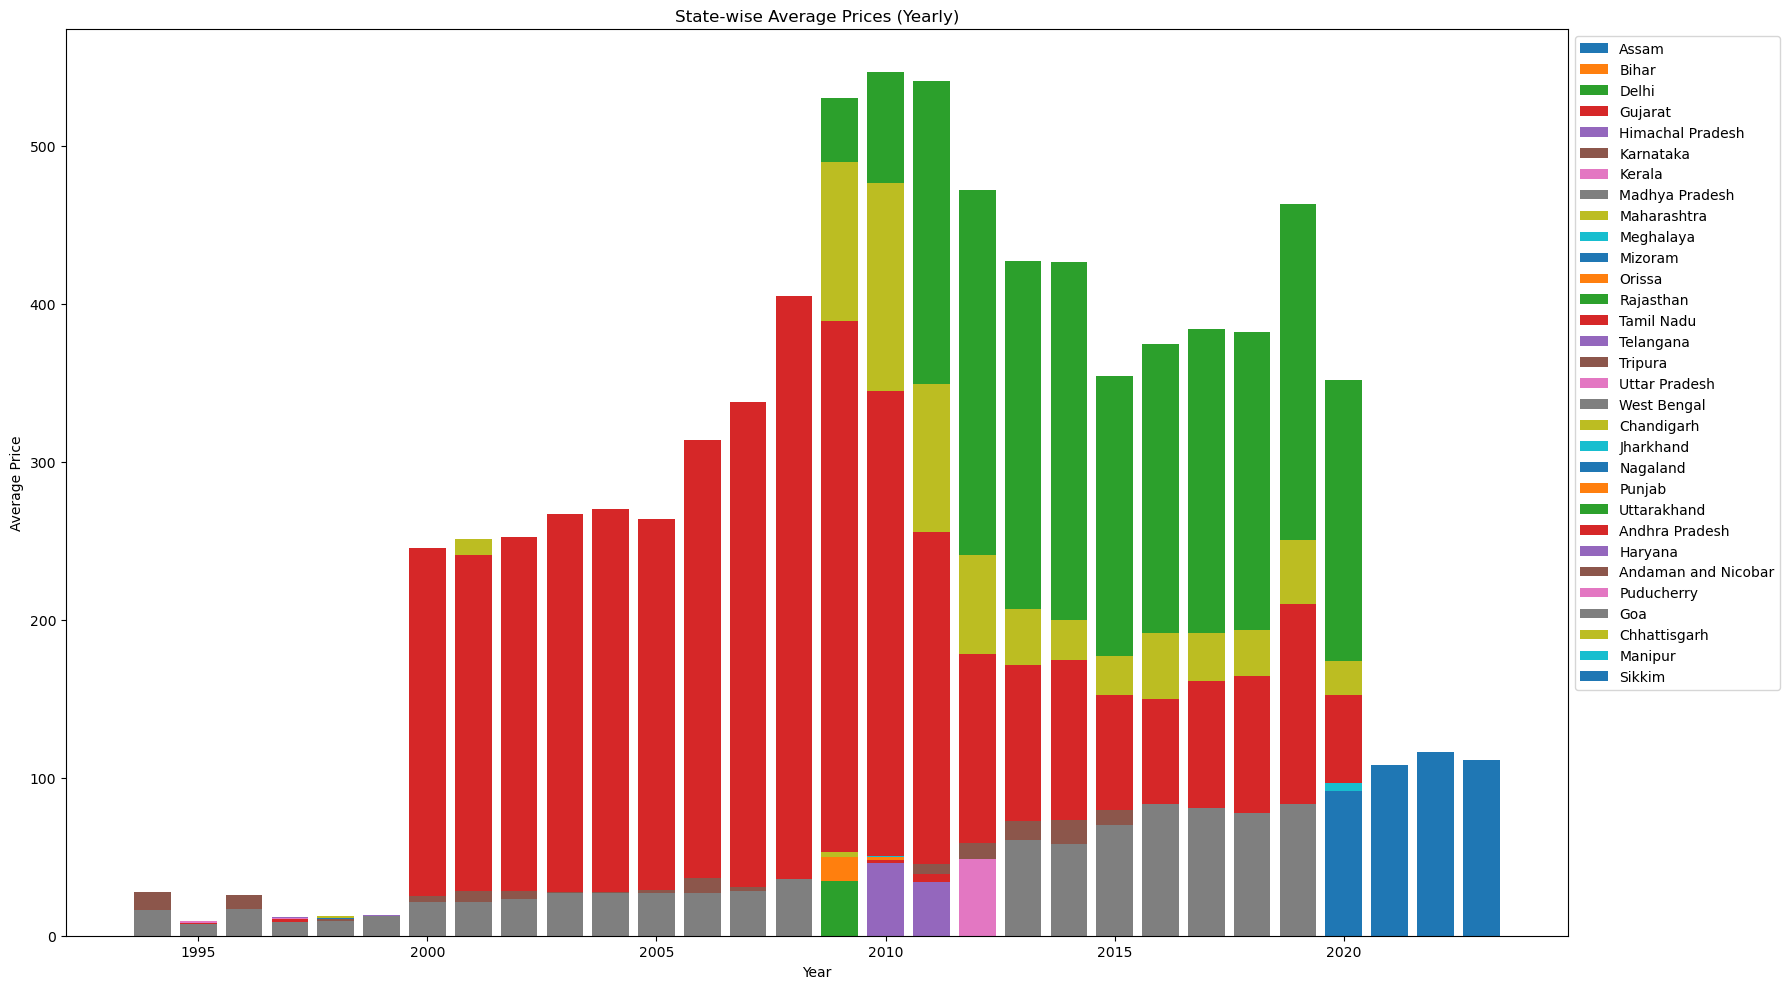

In [19]:


# Assuming your data is in a DataFrame named df
# Convert 'date' column to datetime data type
df['date'] = pd.to_datetime(df['date'])

# Extract year from the 'date' column and create a new column 'year'
df['year'] = df['date'].dt.year

# Group data by 'year' and 'state', calculate mean price for each state in each year
grouped_data = df.groupby(['year', 'state'])['price'].mean().reset_index()

# Plotting the bar graph
plt.figure(figsize=(18, 10))
for state in grouped_data['state'].unique():
    state_data = grouped_data[grouped_data['state'] == state]
    plt.bar(state_data['year'], state_data['price'], label=state)

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('State-wise Average Prices (Yearly)')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [20]:
df['price'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 1           8.00
2           5.00
3          13.50
4          31.00
5           6.80
           ...  
211058    105.40
211059    114.95
211060    115.10
211061     28.15
211062    125.00
Name: price, Length: 210273, dtype: float64>

In [21]:
df.loc[211062]

date           2023-07-15 00:00:00
state                  West Bengal
place               West Midnapore
market                   Kharagpur
latitude                  22.33933
longitude                 87.22672
category     vegetables and fruits
commodity                 Tomatoes
unit                            KG
priceflag                   actual
pricetype                   Retail
currency                       INR
price                        125.0
usdprice                    1.5218
year                          2023
Name: 211062, dtype: object

In [22]:
df['price'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 1           8.00
2           5.00
3          13.50
4          31.00
5           6.80
           ...  
211058    105.40
211059    114.95
211060    115.10
211061     28.15
211062    125.00
Name: price, Length: 210273, dtype: float64>

In [23]:
df.loc[2]

date         1994-01-15 00:00:00
state                      Delhi
place                      Delhi
market                     Delhi
latitude               28.666667
longitude              77.216667
category      cereals and tubers
commodity                  Wheat
unit                          KG
priceflag                 actual
pricetype                 Retail
currency                     INR
price                        5.0
usdprice                  0.1594
year                        1994
Name: 2, dtype: object

C:\Users\Bindu\AppData\Local\Temp\ipykernel_23912\3409180893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month


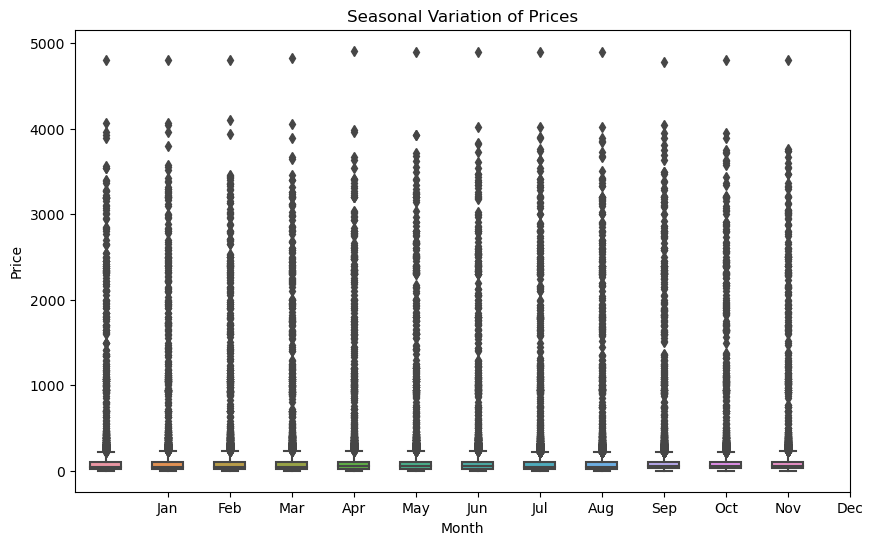

In [24]:
# Create a box plot for seasonal variation of prices

df['month'] = df['date'].dt.month

plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='price', data=df, width=0.5)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Seasonal Variation of Prices')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

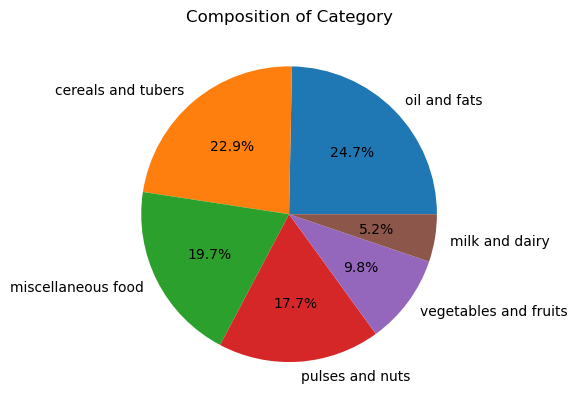

In [25]:
plt.pie(df['category'].value_counts(), labels = df['category'].value_counts().index, autopct='%1.1f%%')
plt.title('Composition of Category')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

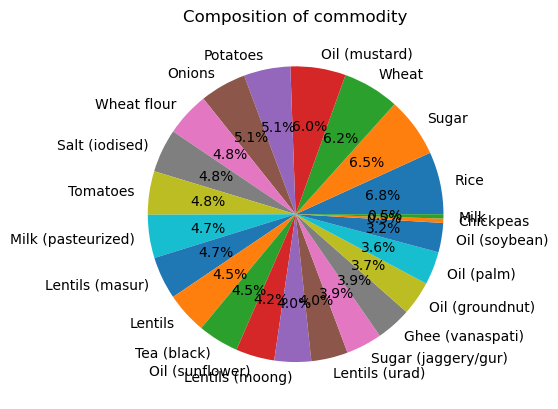

In [26]:
plt.pie(df['commodity'].value_counts(), labels = df['commodity'].value_counts().index, autopct='%1.1f%%')
plt.title('Composition of commodity')
plt.show

C:\Users\Bindu\AppData\Local\Temp\ipykernel_23912\46096943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'], errors='coerce')


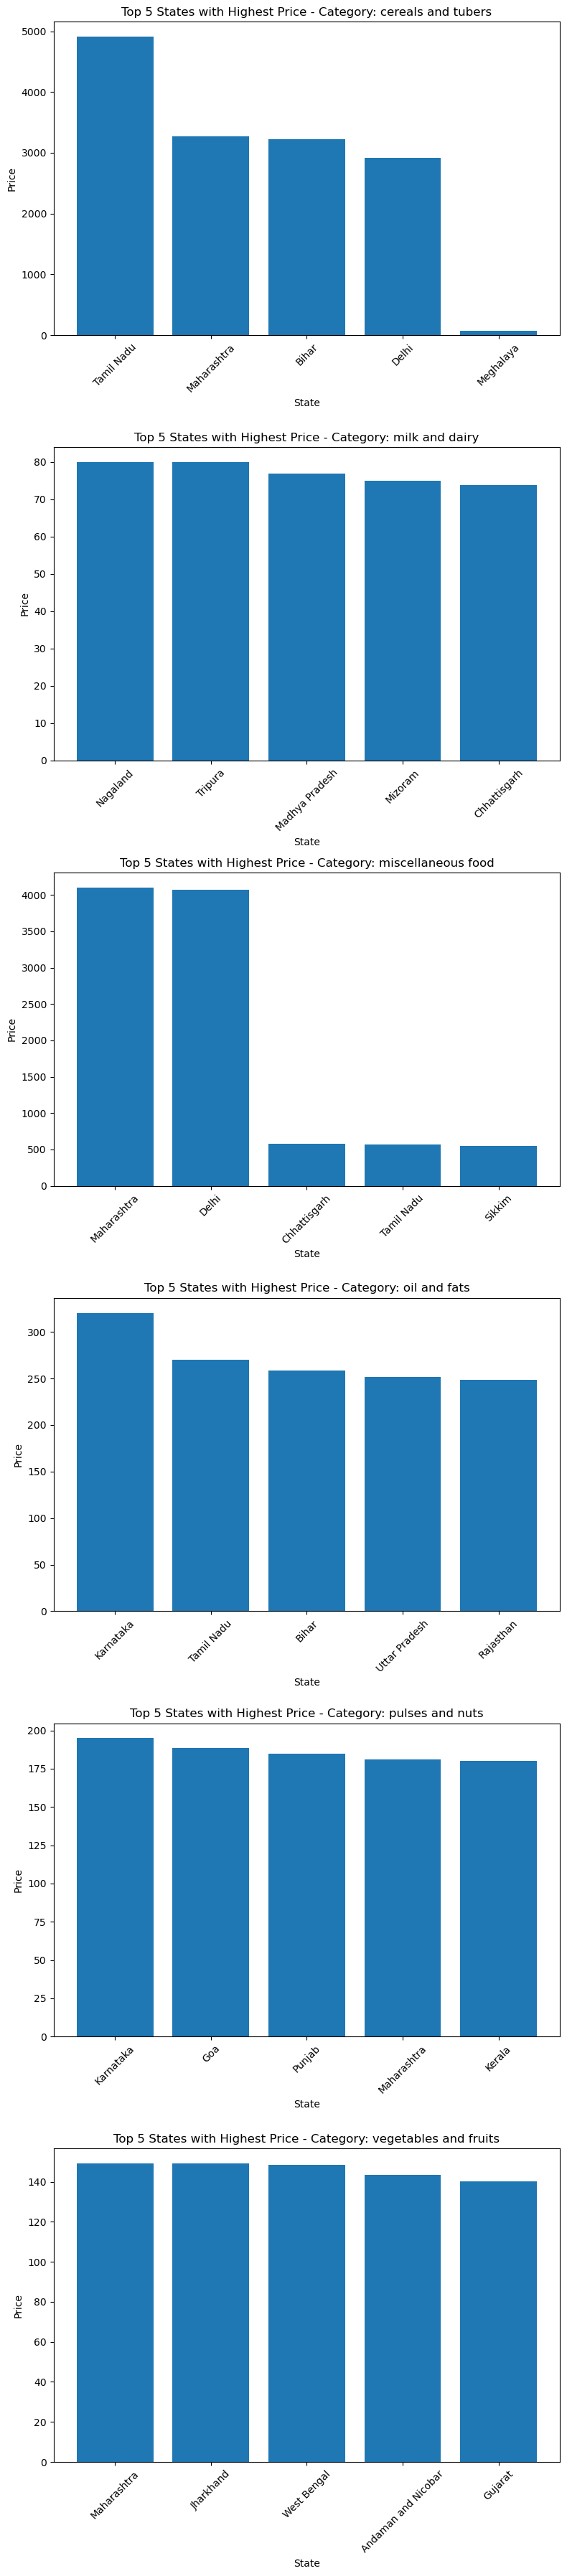

In [29]:

# Assuming df is your DataFrame
# Convert 'price' column to numeric (in case it's not already)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Group data by 'state' and 'category', find highest price in each category for each state
grouped_data = df.groupby(['state', 'category'])['price'].max().reset_index()

# Sort data by 'category' and 'price' in descending order, get top 5 states for each category
top_states_per_category = grouped_data.sort_values(by=['category', 'price'], ascending=[True, False]).groupby('category').head(5)

# Create subplots for each category
categories = top_states_per_category['category'].unique()
num_categories = len(categories)

fig, axes = plt.subplots(nrows=num_categories, ncols=1, figsize=(8, 6*num_categories))

for index, category in enumerate(categories):
    ax = axes[index]
    category_data = top_states_per_category[top_states_per_category['category'] == category]
    ax.bar(category_data['state'], category_data['price'])
    ax.set_title(f'Top 5 States with Highest Price - Category: {category}')
    ax.set_xlabel('State')
    ax.set_ylabel('Price')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


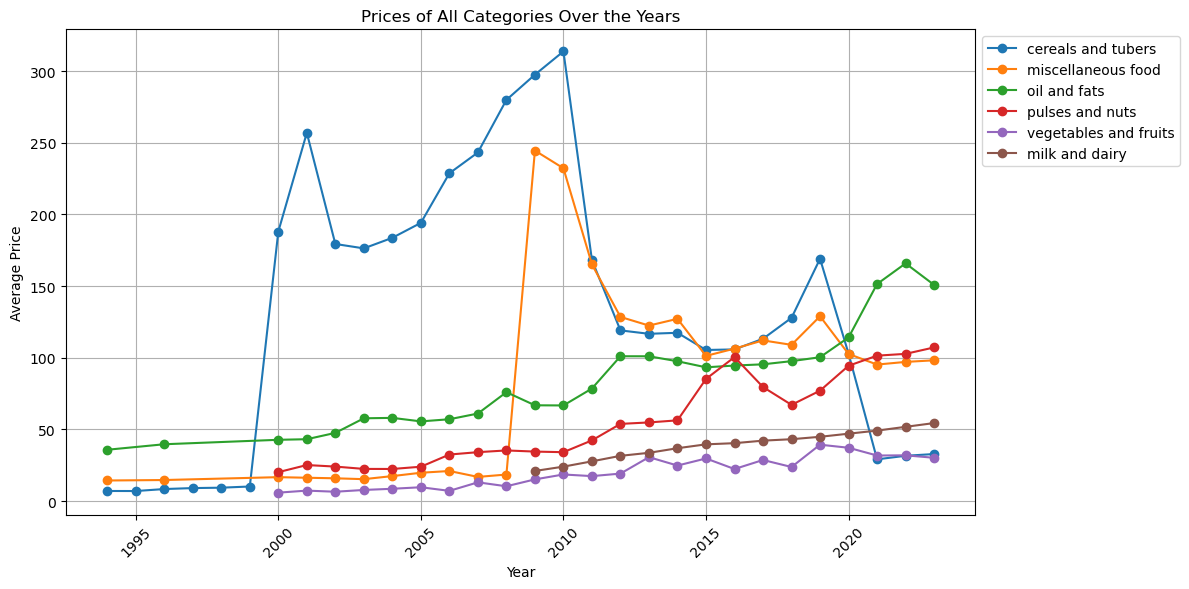

In [31]:


# Group data by 'year' and 'category', calculate average prices
grouped_data = df.groupby(['year', 'category'])['price'].mean().reset_index()

# Create a line chart for prices of all categories over the years
plt.figure(figsize=(12, 6))
categories = grouped_data['category'].unique()

for category in categories:
    category_data = grouped_data[grouped_data['category'] == category]
    plt.plot(category_data['year'], category_data['price'], label=category, marker='o')

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Prices of All Categories Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
#Why is there a hike of Price of Cereals and Tubers in the year 2000s
#Why is there a hike of Price of Miscellaneous food in the year 2005-2010s
#Why is there a sudden decrease of Price of Cereals and Tubers over the decades


#Q1 - Lowest Price of all time 
market                     Delhi
category      cereals and tubers
commodity                  Wheat
price                        5.0
year                        1994

#Q2 - Highest Price of all time
state                  West Bengal
place               West Midnapore
market                   Kharagpur
category     vegetables and fruits
commodity                 Tomatoes
price                        125.0
year                          2023

#Q3 - Highest Composition of category - Oil and Fats
Lowest Composition of Category - Milk and Dairy

#Q4 - Highest Composition of Commodity - Rice
Lowest Composition of Commodity - Milk and Chickpeas

#Q5 - Highest Cereals and Tubers Price - Tamil Nadu
Highest Milk and Dairy Price - Nagaland
Highest Miscellaneous Food - Maharashtra
Highest Oil and Fats - Karnataka
Highest Pulses and Nuts - Karnataka
Highest Vegetables and Fruits - Maharashtra

